<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/Multilabel_Classification_Stack_overflowTags_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this article, we are going to explore multi label classification. Genrally we pose our problem into  multi class classification or bnary classification problems. In this specific  tutorial, we will explore multilabel classification.
A great way to start is to use stackoverflow tag prediction problem. Facebook made some dataset available for facebook recruiting III in kaggle.
The dataset can found in the [Facebook Recruiting III - Keyword Extraction](https://https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data)

For simplicity, we will be building it small. For this project, we will use the strip down version of similar dataset. We will use [Predicting Stack Overflow Tags with Google’s Cloud AI](https://stackoverflow.blog/2019/05/06/predicting-stack-overflow-tags-with-googles-cloud-ai/)

In this blog, we have created a dataset to predict the tags of machine learning related tags.
To make the problem more harder, they have replaced the words like tensorflow,tf,pandas,pd,etc  with the word **"avacado"**

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data:

In [2]:
# using pandas dataframe to load the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/NLP/NLP_Projects/Multilabel_classification_stack_overflow/SO_ml_tags_avocado_188k_v2.csv")

In [4]:
dataset.head()

,extracted_tags,original_tags,text
0,"matplotlib,pandas","python,matplotlib,pandas",setting xticks and yticks for scatter plot mat...
1,"scikitlearn,keras","python,numpy,scikit-learn,keras,grid-search",gridseachcv - valueerror: found input variable...
2,"matplotlib,scikitlearn","python,numpy,matplotlib,scikit-learn,nmf",non negative matrix factorisation in python on...
3,"pandas,tensorflow","python,pandas,tensorflow,time-series",avocado equivalent to avocado.dataframe.resamp...
4,"matplotlib,pandas","python,matplotlib,plot,pandas",how to plot on avocado python i have a data fr...


In [5]:
dataset['text'][10]

'how should i pass a avocado object through a function; as axis, axes or figure? sorry in advance if this is a little long winded but if i cut it down too much the problem is lost. i am trying to make a module on top of avocado and avocado which will give me the ability to make profile plots and profile matrices analogous to scatter_matrix. i am pretty sure my problem comes down to what object i need to return from profile() so that i can handle axes manipulation in profile_matrix(). then the question is what to return form profile_matrix() so i can edit subplots.  my module (profilemodule.py) borrows a lot from https://github.com/pydata/avocado/blob/master/avocado/tools/plotting.py and looks like:  import avocado as avocado from avocado import series, dataframe import numpy as np import avocado.pyplot as avocado  def profile(x,y,nbins,xmin,xmax):     df = dataframe({\'x\' : x , \'y\' : y})      binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)     df[\'bin\'] = np.digitize(df

In [5]:
# Randomly checking the text for better understanding 
import random 

random_text = random.choice(dataset['text'])
random_text

"how to go to the next index in avocado `iterrows()`? say i have a dataframe like:                jpm 2008-01-02  38.47 2008-01-03  38.20 2008-01-04  39.33   edit: expected output:              symbol order   shares 2011-01-10  jpm    nothing 0 2011-01-13  jpm    buy     1000 2011-01-13  jpm    sell    0   how can i compare the second row to the first row? i want to see if the value of spy is greater on the second day than the first.   right now i have the following code:  for index, row in df_prices.iterrows():      if df_prices[index + 1]['symbol'] &gt; df_prices[index]['symbol'] and curr_hold == 0:          df_orders[index]['order'] = 'sell'          df_orders[index]['shares'] += 1000   but i get the error:  valueerror: cannot add integral value to timestamp without freq.   i think it's because i do index + 1. thus, i don't know how to use iterrows() for my application.   edit: after a commenter's suggestion, here is my new code with the expected output above.   if df_prices['jpm'].

In [5]:
# The publishers has modified the dataset and published the preprocessed article
# we are not doing any kind of preprocessing 

dataset= dataset.drop(['original_tags'],axis=1)




In [6]:
dataset.head()

,extracted_tags,original_tags,text
0,"matplotlib,pandas","python,matplotlib,pandas",setting xticks and yticks for scatter plot mat...
1,"scikitlearn,keras","python,numpy,scikit-learn,keras,grid-search",gridseachcv - valueerror: found input variable...
2,"matplotlib,scikitlearn","python,numpy,matplotlib,scikit-learn,nmf",non negative matrix factorisation in python on...
3,"pandas,tensorflow","python,pandas,tensorflow,time-series",avocado equivalent to avocado.dataframe.resamp...
4,"matplotlib,pandas","python,matplotlib,plot,pandas",how to plot on avocado python i have a data fr...


In [7]:
dataset.shape

(188199, 3)

In [8]:
real_text = dataset['text'][10]
real_text

'how should i pass a avocado object through a function; as axis, axes or figure? sorry in advance if this is a little long winded but if i cut it down too much the problem is lost. i am trying to make a module on top of avocado and avocado which will give me the ability to make profile plots and profile matrices analogous to scatter_matrix. i am pretty sure my problem comes down to what object i need to return from profile() so that i can handle axes manipulation in profile_matrix(). then the question is what to return form profile_matrix() so i can edit subplots.  my module (profilemodule.py) borrows a lot from https://github.com/pydata/avocado/blob/master/avocado/tools/plotting.py and looks like:  import avocado as avocado from avocado import series, dataframe import numpy as np import avocado.pyplot as avocado  def profile(x,y,nbins,xmin,xmax):     df = dataframe({\'x\' : x , \'y\' : y})      binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)     df[\'bin\'] = np.digitize(df

In [9]:
tags=dataset['extracted_tags'][10]
tags

'matplotlib,pandas'

### Visualizing the dataset:

In [8]:
tag_distribution = dataset['extracted_tags'].value_counts()
tag_distribution

pandas                           90890
tensorflow                       32445
matplotlib                       31751
scikitlearn                      11977
keras                             8196
tensorflow,keras                  6118
pandas,matplotlib                 3850
pandas,scikitlearn                1397
matplotlib,pandas                  556
matplotlib,scikitlearn             220
scikitlearn,keras                  190
pandas,tensorflow                  141
tensorflow,scikitlearn             117
pandas,keras                        86
matplotlib,tensorflow               47
tensorflow,scikitlearn,keras        46
scikitlearn,tensorflow              33
keras,scikitlearn                   30
matplotlib,keras                    25
pandas,tensorflow,keras             22
pandas,matplotlib,scikitlearn       20
tensorflow,matplotlib               13
pandas,scikitlearn,keras             6
matplotlib,tensorflow,keras          6
tensorflow,matplotlib,keras          3
pandas,tensorflow,scikitl

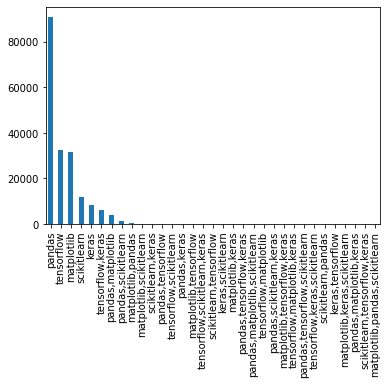

In [9]:
tag_distribution.plot(kind='bar')

In [10]:
# Checking for duplicate
dataset.duplicated().value_counts()


False    188199
dtype: int64

In [11]:
# We can drop them
dataset =  dataset.drop_duplicates()

In [12]:
dataset.shape

(188199, 3)

We have seen the distribution of the tags are bit scewed. We will convert them to list.
Let us explore the ast module

In [13]:
type(dataset['extracted_tags'].iloc[1800])

str

In [14]:
dataset['extracted_tags']=dataset['extracted_tags'].apply(lambda x : x.split(','))

In [15]:
dataset['extracted_tags'].head()

0         [matplotlib, pandas]
1         [scikitlearn, keras]
2    [matplotlib, scikitlearn]
3         [pandas, tensorflow]
4         [matplotlib, pandas]
Name: extracted_tags, dtype: object

Now, we have our text feature and we tags. We have the tags in the form of list.
There are different ways to convert the tags into bnary values. As we are possing this problem as multilabel classification. That means each class might have more than one labels. We are going to use multilabelbinarizer.
For the y, we are going to use multilabelbinarizer.






In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(dataset['extracted_tags'])
y

array([[0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       ...,
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0]])

In [17]:
# Printing the classes :
multilabel.classes_

array(['keras', 'matplotlib', 'pandas', 'scikitlearn', 'tensorflow'],
      dtype=object)

This are the five classes we have.

['keras', 'matplotlib', 'pandas', 'scikitlearn', 'tensorflow']


In [20]:
# Our y is represented as below:
pd.DataFrame(y,columns=multilabel.classes_)

,keras,matplotlib,pandas,scikitlearn,tensorflow
0,0,1,1,0,0
1,1,0,0,1,0
2,0,1,0,1,0
3,0,0,1,0,1
4,0,1,1,0,0
...,...,...,...,...,...
188192,0,0,1,1,0
188193,0,0,1,1,0
188194,0,0,1,1,0
188195,0,0,1,1,0


In [18]:
import re
def decontracted(text):

    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"n't", "not", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"'s", " own", text)
    text = re.sub("%", "percent", text)
    text = re.sub("₹", 'rupee', text)
    text = re.sub("$", "dollar", text)
    text = re.sub("€", "euro", text)
    text = re.sub("cannot", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [19]:
dataset['text'] = dataset['text'].apply(decontracted)

In [23]:
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

In [24]:
def remove_numbers(text):

  res=''.join([i for i in text if not i.isdigit()])

  return res


In [25]:
def remove_nonwords(text):
  pattern = re.compile('\W')

  if type(text)==type(''):
    text = re.sub(pattern,' ',text)

  return text

In [26]:
def remove_htmltags(text):

  cleantext = re.compile(r'<[^>]+>').sub('',text) # https://www.geeksforgeeks.org/program-to-remove-html-tags-from-a-given-string/
  cleantext = BeautifulSoup(text, "lxml").text

  return cleantext

In [27]:
def remove_multiple_space(text):


  text = re.sub(' +',' ',text)

  return text

In [28]:
def text_clean(text):
  text=str(text).lower()
  text = decontracted(text)
  text = remove_urls(text)
  text = remove_htmltags(text)
  text = remove_numbers(text)
  text = remove_nonwords(text)
  text = remove_multiple_space(text)
  #text = remove_stopwords(text)
  return text

In [29]:
from bs4 import BeautifulSoup
dataset['text']=dataset['text'].apply(text_clean)

In [33]:
random_preprocessed_text = random.choice(dataset['text'])
print(random_preprocessed_text)

avocado multiple input model doesnot work i have bulit a model to distinguish cats from dogs using kaggle own cats_vs_dogs data set i have tried two ways to do it for the first one i used three existing models resnet xception inceptionv to extract features i put the traing data through these models own convolutional base predict and concatenate the results then use them for a standalone densely connected classifier the result is pretty good after five epoches training val_acc became percent then i want to use data augmentation and fine tuing so i extended the those three models by adding layers on top and running he whole thing end to end on the input data the strange thing is the second way got good result in the traing but lousy one in the validation and the val_acc is always a constant i feel very confused how come these two ways have such different results here is my code from avocado models import from avocado layers import from avocado applications import from avocado preprocessi

# Creating the baseline model:

In this model, we will use the TFIDF vectoriser and then going to train Logistic regression and linear SVM and random  forest



In [30]:
dataset.head()

,extracted_tags,text
0,"[matplotlib, pandas]",setting xticks and yticks for scatter plot mat...
1,"[scikitlearn, keras]",gridseachcv valueerror found input variables w...
2,"[matplotlib, scikitlearn]",non negative matrix factorisation in python on...
3,"[pandas, tensorflow]",avocado equivalent to avocado dataframe resamp...
4,"[matplotlib, pandas]",how to plot on avocado python i have a data fr...


In [20]:
X= dataset.iloc[:,1]

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

131739
131739
56460
56460


In [23]:
### Text vectorization:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf = TfidfVectorizer(analyzer='word',max_features=2500,ngram_range=(1,1),stop_words='english',lowercase=True)

x_train=tfidf.fit_transform(x_train)








In [25]:
x_test = tfidf.transform(x_test)

### Understanding the shapes of the x_tran,y_train,x_test,y_test


In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(131737, 10000)
(131737, 5)
(56460, 10000)
(56460, 5)


### Model building:
We are going to build 3 models: 

sgd = SGDclassifier()

lr = LogisticRegression()

svc = linearSVC()

In [30]:
### Evaluation matrix for multi-label classification 

def j_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
  return jaccard.mean()*100


def print_score(y_pred, clf):
  print("Clf: ", clf.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test, y_pred)))
  print('----')

In [43]:

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier



In [44]:
for classifier in [LinearSVC(C=1.5, penalty = 'l1', dual=False)]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print_score(y_pred, classifier)

Clf:  LinearSVC
Jacard score: 90.95318219388358
----


In [45]:
sgd = SGDClassifier()

lr = LogisticRegression()

svc = LinearSVC()

In [46]:
for classifier in [sgd,lr,svc]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(x_train,y_train)
  y_pred =clf.predict(x_test)
  print_score(y_pred,classifier)

Clf:  SGDClassifier
Jacard score: 88.58100129885463
----


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Clf:  LogisticRegression
Jacard score: 90.11719211240997
----
Clf:  LinearSVC
Jacard score: 90.94019364742
----


# Model testing in real data:

In [47]:
random_preprocessed_text

'avocado multiple input model doesnot work i have bulit a model to distinguish cats from dogs using kaggle own cats_vs_dogs data set i have tried two ways to do it for the first one i used three existing models resnet xception inceptionv to extract features i put the traing data through these models own convolutional base predict and concatenate the results then use them for a standalone densely connected classifier the result is pretty good after five epoches training val_acc became percent then i want to use data augmentation and fine tuing so i extended the those three models by adding layers on top and running he whole thing end to end on the input data the strange thing is the second way got good result in the traing but lousy one in the validation and the val_acc is always a constant i feel very confused how come these two ways have such different results here is my code from avocado models import from avocado layers import from avocado applications import from avocado preprocess

In [48]:
x = ['how should i pass a avocado object through a function as axis axes or figure sorry in advance if this is a little long winded but if i cut it down too much the problem is lost i am trying to make a module on top of avocado and avocado which will give me the ability to make profile plots and profile matrices analogous to scatter_matrix i am pretty sure my problem comes down to what object i need to return from profile so that i can handle axes manipulation in profile_matrix then the question is what to return form profile_matrix so i can edit subplots my module profilemodule py borrows a lot from and looks like import avocado as avocado from avocado import series dataframe import numpy as np import avocado pyplot as avocado def profile x y nbins xmin xmax df dataframe x x y y binedges xmin xmax xmin nbins np arange nbins df bin np digitize df x binedges bincenters xmin xmax xmin nbins np arange nbins xmax xmin nbins profileframe dataframe bincenters bincenters n df bin value_counts sort false index range nbins bins profileframe index values for bin in bins profileframe ix bin ymean df ix df bin bin y mean profileframe ix bin ystanddev df ix df bin bin y std profileframe ix bin ymeanerror profileframe ix bin ystanddev np sqrt profileframe ix bin n fig avocado figure ax profileplot add_subplot avocado errorbar profileframe bincenters profileframe ymean yerr profileframe ymeanerror xerr xmax xmin nbins fmt none return ax or should i return fig def profile_matrix frame import avocado core common as com import avocado tools plotting as plots from avocado compat import lrange from avocado artist import setp range_padding df frame _get_numeric_data n df columns size fig axes plots _subplots nrows n ncols n squeeze false no gaps between subplots fig subplots_adjust wspace hspace mask com notnull df boundaries_list for a in df columns values df a values mask a values rmin_ rmax_ np min values np max values rdelta_ext rmax_ rmin_ range_padding boundaries_list append rmin_ rdelta_ext rmax_ rdelta_ext for i a in zip lrange n df columns for j b in zip lrange n df columns ax axes i j common mask a mask b values nbins xmin xmax boundaries_list i ax profile df b common df a common nbins xmin xmax profile df b common values df a common values nbins xmin xmax ax set_xlabel ax set_ylabel plots _label_axis ax kind x label b position bottom rotate true plots _label_axis ax kind y label a position left if j ax yaxis set_visible false if i n ax xaxis set_visible false for ax in axes flat setp ax get_xticklabels fontsize setp ax get_yticklabels fontsize return axes this will run with something like import avocado as avocado from avocado import series dataframe import numpy as np import avocado pyplot as avocado import profilemodule as pm x np random uniform size y x x x np random randn z x y y np random randn nbins xmax xmin profileplot pm profile x y nbins xmin xmax avocado title look this works this does not work as expected frame dataframe z z x x y y profilematrix pm profile_matrix frame avocado show this would hopefully produce a simple profile plot and a x profile matrix but it does not i have tried various different methods to get this to work but i imagine it is not worth explaining them all i should mention i am using enthought canopy express on windows sorry for the long post and thanks again for any help with the code this is my first week using python dollardollardollar']

In [49]:
xt=tfidf.transform([random_preprocessed_text])


In [50]:
clf.predict(xt)

array([[1, 0, 0, 0, 0]])

In [51]:
multilabel.inverse_transform(clf.predict(xt))

[('keras',)]

The model testing is not working as expected.

# Multilabel classifier can be trained in the following ways:

1. Problem transformation
2. Adapted algorithims 
3. Ensembles approaches 


###Problem Transformation:

We will try problem transformation using 
1. Binary Revelance
2. Classifier chain 

In [26]:
pip install scikit-multilearn

In [55]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression

classifier=BinaryRelevance(LogisticRegression())
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [57]:
 from sklearn.metrics import f1_score

 score_Macro = f1_score(y_true=y_test,y_pred=y_pred, average='macro')
 score_Micro = f1_score(y_true=y_test,y_pred=y_pred,average='micro')
 

In [58]:
print(score_Macro)
print(score_Micro)

0.9996256010695692
0.9997517378351539
